In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import random

In [3]:
df_0 = pd.read_pickle('process_events/pred_B0.pkl')
df_0.index = df_0.index.astype(int)

df_1 = pd.read_pickle('process_events/pred_B1.pkl')
df_1.index = df_1.index.astype(int)

df_2 = pd.read_pickle('process_events/pred_B2.pkl')
df_2.index = df_2.index.astype(int)

df_3 = pd.read_pickle('process_events/pred_B3.pkl')
df_3.index = df_3.index.astype(int)

df_5 = pd.read_pickle('process_events/pred_B5.pkl')
df_5.index = df_5.index.astype(int)

df_all = pd.concat([df_0, df_1, df_2, df_3, df_5], axis=0)
df_all.shape

(134547911, 8)

In [4]:
del df_0, df_1, df_2, df_3, df_5
gc.collect()

0

In [17]:
all_events = df_all.index.to_list()

In [10]:
df_all['min_error'] = df_all[['error_m0', 'error_m1', 'error_m2', 'error_m3']].min(axis=1)
signal_events_list = df_all[df_all['min_error'] < 0.5].index.to_list()

In [18]:
len(set(signal_events_list)), len(set(all_events))

(58650650, 56830897, 131953924)

In [20]:
signal_events_unique = set(signal_events_list)
all_events_unique = set(all_events)
noise_events_unique = all_events_unique - signal_events_unique

len(signal_events_unique), len(noise_events_unique)

(56830897, 75123027)

In [22]:
signal_events_unique = list(signal_events_unique)
random.shuffle(signal_events_unique)
p0 = signal_events_unique[:len(signal_events_unique)//2]
p1 = signal_events_unique[len(signal_events_unique)//2:]

noise_events_unique = list(noise_events_unique)
random.shuffle(noise_events_unique)
p2 = noise_events_unique[:len(noise_events_unique)//2]
p3 = noise_events_unique[len(noise_events_unique)//2:]

len(p0), len(p1), len(p2), len(p3)

(28415448, 28415449, 37561513, 37561514)

In [23]:
len(p0)+ len(p1)+ len(p2)+ len(p3)

131953924

In [24]:
focus_dict = {
    'f0': p0,
    'f1': p1,
    'f2': p2,
    'f3': p3
}

import pickle
with open('focus_dict.pkl', 'wb') as f:
    pickle.dump(focus_dict, f)

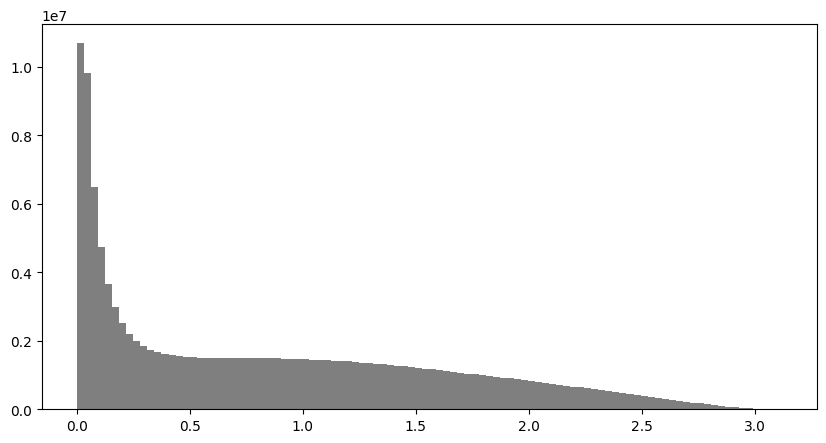

In [10]:
plt.figure(figsize=(10, 5))

plt.hist(df_all['min_error'], bins=100, color='black', alpha=0.5)

plt.show()

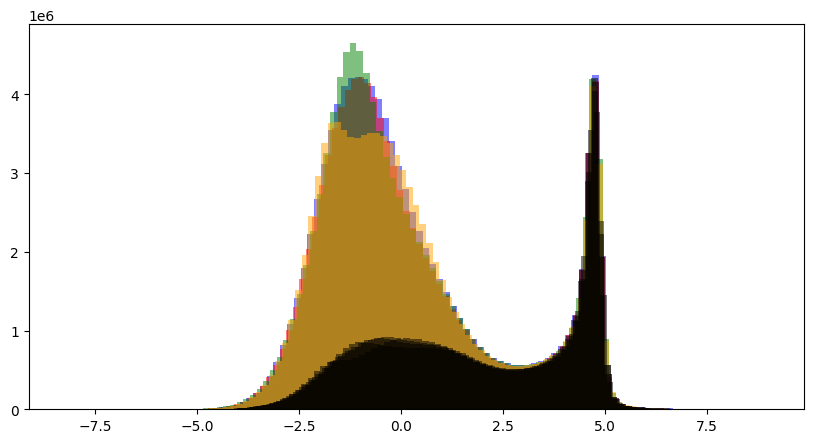

In [11]:
plt.figure(figsize=(10, 5))
df_all_study = df_all[df_all['min_error'] < 0.5]
plt.hist(np.log(df_all['kappa_m0']), bins=100, color='blue', alpha=0.5)
plt.hist(np.log(df_all['kappa_m1']), bins=100, color='red', alpha=0.5)
plt.hist(np.log(df_all['kappa_m2']), bins=100, color='green', alpha=0.5)
plt.hist(np.log(df_all['kappa_m3']), bins=100, color='orange', alpha=0.5)
plt.hist(np.log(df_all_study['kappa_m0']), bins=100, color='black', alpha=0.5)
plt.hist(np.log(df_all_study['kappa_m1']), bins=100, color='black', alpha=0.5)
plt.hist(np.log(df_all_study['kappa_m2']), bins=100, color='black', alpha=0.5)
plt.hist(np.log(df_all_study['kappa_m3']), bins=100, color='black', alpha=0.5)

plt.show()